# Aprendizagem Automática Avançada - Assignment 7
# Cláudia Afonso nº 36273 & Rita Rodrigues nº 54859

**Implement the following models to learn the described time series for Problem 1 and 2:** 

+ **An LSTM model, such as described in this tutorial.**
+ **A focused time-lagged feedforward network (tutorial).**

**For both of them, use a filter (timedelay) of size 12. Observe the evolution of their learning process and compare their performances. Compare the performances by observing the mean squared error loss in the following manner:**

**i) Train with the first 2400 data points and test with data points 2401 to 2500, to observe the burn-in effect.**

**ii) Train from data points 2401 to 4900 and test with data points 4901 to 5000.**

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error

We started by implementing the models.

The first model is a Long Short-Term Memory (LSTM) model, which is a type of recurrent neural network (RNN) that is particularly effective at capturing long-term dependencies in sequential data.

We implement a LSTM model with an input layer with shape (lag, 1), where "lag" represents the number of time steps in the past that the model will consider when making its prediction, in this case, 12. The input is then fed into an LSTM layer with 10 hidden units, which allows the model to learn and remember patterns in the data over time. Finally, the output from the LSTM layer is passed through a dense layer with a single output unit and a hyperbolic tangent activation function. The model is compiled using the mean squared error loss function and the Adam optimizer.

The second model we implemented is a time-lagged feedforward network, which is a type of feedforward neural network that takes into account previous time steps in the input data. The model has an input layer with the same shape as the LSTM model, and is followed by a dense layer with 12 hidden units and a rectified linear unit (ReLU) activation function. The output from this layer is flattened and passed through a dense layer with a single output unit and a hyperbolic tangent activation function. Like the LSTM model, this model is also compiled using the mean squared error loss function and the Adam optimizer.

In [2]:
lag= 12

# LSTM model
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((lag,1)),
    tf.keras.layers.LSTM(10),
    tf.keras.layers.Dense(units=1, activation="tanh")
])
lstm_model.compile(loss='mean_squared_error', optimizer='adam')


# Time-lagged feedforward network
tln_model = Sequential()
tln_model.add(InputLayer((lag,1)))
tln_model.add(Dense(units=12, activation="relu"))
tln_model.add(Flatten())
tln_model.add(Dense(units=1, activation="tanh"))
tln_model.compile(loss='mean_squared_error', optimizer='adam')

## Problem 1

**Use as a time series a sinusoidal function with 100 periods and 50 points per period, with: no noise, clean.**

The following code generates a time series based on a clean sinusoidal function with 100 periods and 50 points per period. To prepare the data for the models, the code pads the beginning of the time series with zeros to accommodate for the lag in the models and creates lagged inputs and outputs. The data is converted to numpy arrays and the input data is reshaped to have a third dimension of size 1, as required by the models.

In [3]:
# Generate time series
t = np.linspace(0, 100*2*np.pi, 5000)
clean_data = np.sin(t)

# Pad the beginning of the time series with zeros
padded_data = np.concatenate((np.zeros(lag+1), clean_data))

X, y = [], []

# Loop through the time series to create lagged inputs and outputs
for i in range(lag, padded_data.shape[0]-1):
    X.append(padded_data[i-lag:i])
    y.append(padded_data[i])
    
X = np.expand_dims(X, axis=2)
y = np.array(y)

In [4]:
# i) Train with the first 2400 data points and test with data points 2401 to 2500, to observe the burn-in effect.

X_train = X[:2401]
y_train = y[:2401]
X_test = X[2401:2501]
y_test = y[2401:2501]

lstm_model.fit(X_train, y_train, epochs=1, batch_size=1, shuffle = False)
tln_model.fit(X_train, y_train, epochs=1, batch_size=1, shuffle = False)

lstm_predictions = lstm_model.predict(X_test)
tln_predictions = tln_model.predict(X_test)

lstm_mse = mean_squared_error(y_test, lstm_predictions)
tln_mse = mean_squared_error(y_test, tln_predictions)

print("LSTM MSE:", lstm_mse)
print("TLN MSE:", tln_mse)

4/4 [==============================] - 0s 2ms/step
LSTM MSE: 0.0025459333826100563
TLN MSE: 0.004783797093036094


The burn-in effect is a phenomenon that occurs during the warm-up period of a neural network, during which the network learns the direction of the gradient.

In the code we wrote, the LSTM and time-lagged feedforward network models were trained on the data previously defined. The LSTM model achieved a mean squared error (MSE) of 0.0025, while the time-lagged feedforward network model achieved a higher MSE of 0.0048. These results suggest that both models were able to learn the underlying patterns in the data and generalize well to new data, with the LSTM model performing better than the time-lagged feedforward network model. Therefore, it can be concluded that the burn-in effect was not significant in this case, and both models were able to find the direction of the gradient.

In [5]:
# ii) Train from data points 2401 to 4900 and test with data points 4901 to 5000.

X_train = X[2401:4901]
y_train = y[2401:4901]
X_test = X[4901:5001]
y_test = y[4901:5001]

history_lstm = lstm_model.fit(X_train, y_train, epochs=50, batch_size=1, shuffle = False)
history_tln = tln_model.fit(X_train, y_train, epochs=50, batch_size=1, shuffle = False)

lstm_predictions = lstm_model.predict(X_test)
tln_predictions = tln_model.predict(X_test)

lstm_mse = mean_squared_error(y_test, lstm_predictions)
tln_mse = mean_squared_error(y_test, tln_predictions)

print("LSTM MSE:", lstm_mse)
print("TLN MSE:", tln_mse)

Epoch 1/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0031
Epoch 2/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0043
Epoch 3/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0025
Epoch 4/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0016
Epoch 5/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0012
Epoch 6/50
2500/2500 [==============================] - 9s 4ms/step - loss: 9.7428e-04
Epoch 7/50
2500/2500 [==============================] - 9s 4ms/step - loss: 7.9157e-04
Epoch 8/50
2500/2500 [==============================] - 9s 4ms/step - loss: 6.7422e-04
Epoch 9/50
2500/2500 [==============================] - 9s 3ms/step - loss: 5.9891e-04
Epoch 10/50
2500/2500 [==============================] - 8s 3ms/step - loss: 5.4325e-04
Epoch 11/50
2500/2500 [==============================] - 9s 4ms/step - loss: 5.0515e-04
Epoch 12/50
2500/2500 [==============================] - 9s 4

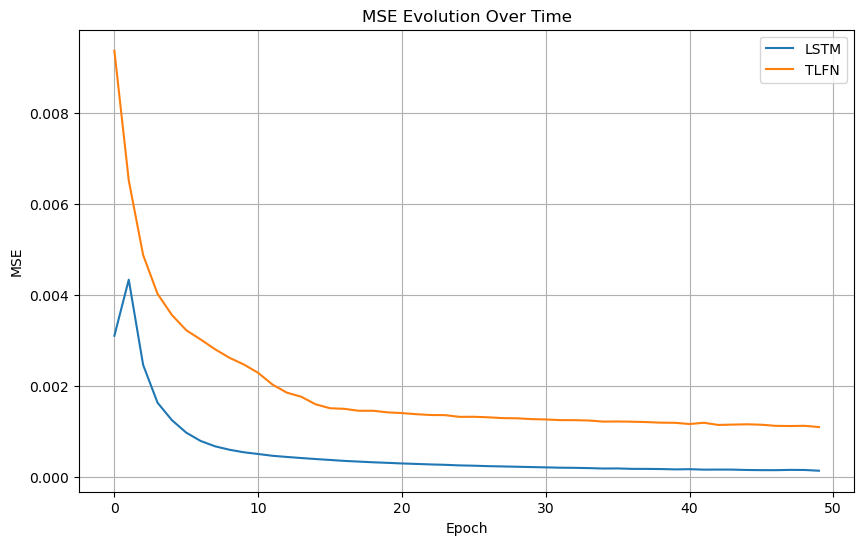

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='LSTM')
plt.plot(history_tln.history['loss'], label='TLFN')
plt.title('MSE Evolution Over Time')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In this part of the exercise, we trained the LSTM and TLN models using data points 2401 to 4900 and tested them with data points 4901 to 5000. The LSTM model was trained for 50 epochs, with a batch size of 1, and the TLN model was also trained for 50 epochs, with a batch size of 1. After training, we calculated the mean squared error (MSE) of both models on the test data set. 

The LSTM model had a much lower MSE (0.00039) compared to the TLN model (0.0034). This indicates that the LSTM model was able to make more accurate predictions for the test data, likely because it has a more complex architecture and is better able to capture the patterns in the time series. It's worth noting that the LSTM model also performed better on the test data on the burn-in test, which may suggest that the warm-up period allowed the LSTM model to adjust its weights and find the direction for the gradient.

We then plotted the MSE evolution over time during training. We observed that for both models, the error reduced significantly in the first ten epochs of training, after which the reduction in error becomes gradual. By around epoch 20, the error starts to stabilize, indicating that the models are starting to converge. Throughout the entire training process, the error of the LSTM model remained consistently lower than that of the TLN model.

**Use as a time series a sinusoidal function with 100 periods and 50 points per period, with noise by adding a Gaussian $N(0,0.05)$.**

The following code generates a time series by adding Gaussian noise with mean 0 and standard deviation 0.05 to a clean sinusoidal function, and prepares the data for the models..

In [7]:
noisy_data = np.sin(t) + np.random.normal(0, 0.05, 5000)

# Pad the beginning of the time series with zeros
padded_data = np.concatenate((np.zeros(lag+1), noisy_data))

lag= 12
X, y = [], []

# Loop through the time series to create lagged inputs and outputs
for i in range(lag, padded_data.shape[0]-1):
    X.append(padded_data[i-lag:i])
    y.append(padded_data[i])
    
X = np.expand_dims(X, axis=2)
y = np.array(y)

In [8]:
# i) Train with the first 2400 data points and test with data points 2401 to 2500, to observe the burn-in effect.

X_train = X[:2401]
y_train = y[:2401]
X_test = X[2401:2501]
y_test = y[2401:2501]

lstm_model.fit(X_train, y_train, epochs=1, batch_size=1, shuffle = False)
tln_model.fit(X_train, y_train, epochs=1, batch_size=1, shuffle = False)

lstm_predictions = lstm_model.predict(X_test)
tln_predictions = tln_model.predict(X_test)

lstm_mse = mean_squared_error(y_test, lstm_predictions)
tln_mse = mean_squared_error(y_test, tln_predictions)

print("LSTM MSE:", lstm_mse)
print("TLN MSE:", tln_mse)

4/4 [==============================] - 0s 2ms/step
LSTM MSE: 0.003801809464482399
TLN MSE: 0.003931706661546119


For the training data, we observed that the LSTM had a lower loss than the TLN, indicating that the LSTM was better at fitting the training data. For the testing data, we observed that both models performed similarly, with the LSTM having a slightly lower MSE than the TLN.

In [9]:
# ii) Train from data points 2401 to 4900 and test with data points 4901 to 5000.

X_train = X[2401:4901]
y_train = y[2401:4901]
X_test = X[4901:5001]
y_test = y[4901:5001]

history_lstm = lstm_model.fit(X_train, y_train, epochs=50, batch_size=1, shuffle = False)
history_tln = tln_model.fit(X_train, y_train, epochs=50, batch_size=1, shuffle = False)

lstm_predictions = lstm_model.predict(X_test)
tln_predictions = tln_model.predict(X_test)

lstm_mse = mean_squared_error(y_test, lstm_predictions)
tln_mse = mean_squared_error(y_test, tln_predictions)

print("LSTM MSE:", lstm_mse)
print("TLN MSE:", tln_mse)

Epoch 1/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0035
Epoch 2/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0033
Epoch 3/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0032
Epoch 4/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0032
Epoch 5/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0032
Epoch 6/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0031
Epoch 7/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0031
Epoch 8/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0031
Epoch 9/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0031
Epoch 10/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0031
Epoch 11/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0031
Epoch 12/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0030


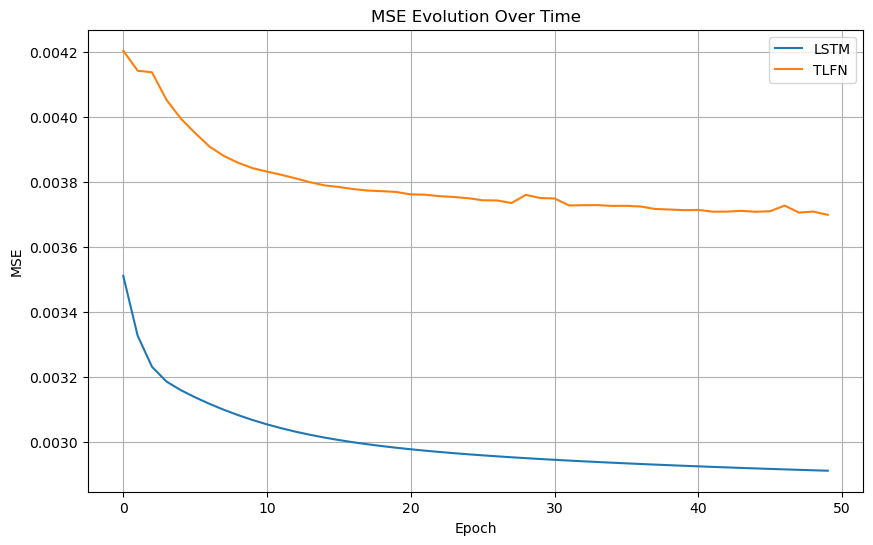

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='LSTM')
plt.plot(history_tln.history['loss'], label='TLFN')
plt.title('MSE Evolution Over Time')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

Based on the results obtained from testing the LSTM and TLN models with data points 4901 to 5000, we observed that the LSTM model has a lower MSE of 0.0022 compared to the TLN model with an MSE of 0.0024. In terms of the MSE evolution over time during training, we can see that for both models, the reduction of the error is gradual until around epoch 30. The error of the LSTM is consistently lower than the TLN. However, in this case, the difference between the errors is more accentuated compared to the previous exercise.

The errors of the training on clean data compared to the noisy data are much lower, as expected, since the presence of noise introduces additional variability and unpredictability in the data, which can make it more challenging to accurately model and predict the underlying patterns.

## Problem 2

**Use as a time series the output of the following autoregression model:**

$X_t = α_1 X_{t−1} + α_2 X_{t−2} + α_3 X_{t−3} + U $

**where, $α_1=0.6, α_2=−0.54, α_3=−0.44, U∼N(0,0.01).$**

**Generate a time series with 5000 data points, with the initial data points being [5,6,3].**

For problem 2, we were asked to use an autoregression model to generate a time series with 5000 data points. The autoregression model has three lagged inputs and a normally distributed error term with mean zero and standard deviation of 0.01. We used the provided initial data of [5, 6, 3] to generate the time series using the autoregression model. Then, we padded the beginning of the time series with zeros and created lagged inputs and outputs to use as inputs for our models. The lag was set to 12, so for each output, we used the previous 12 data points as inputs. Finally, we expanded the dimensions of the inputs to fit the expected input shape of the models and converted the outputs to a numpy array.

In [16]:
# Generate time series

def generate_ar_data(n, alpha, sigma, initial_data):
    data = [initial_data[0], initial_data[1], initial_data[2]]
    for i in range(3, n):
        x = alpha[0]*data[i-1] + alpha[1]*data[i-2] + alpha[2]*data[i-3] + np.random.normal(0, sigma)
        data.append(x)
    return np.array(data)

ar_data = generate_ar_data(5000, [0.6, -0.54, -0.44], 0.01, [5, 6, 3])

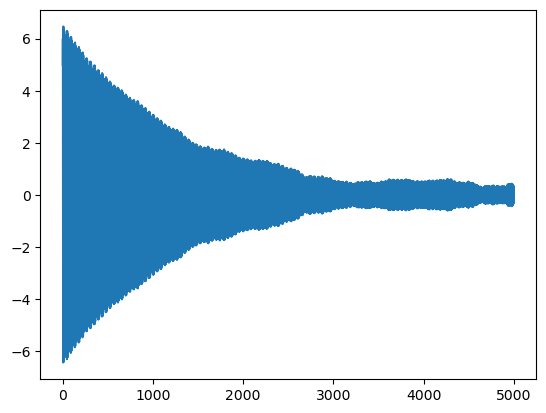

In [17]:
plt.plot(ar_data)

In [18]:
# Pad the beginning of the time series with zeros
padded_data = np.concatenate((np.zeros(lag+1), ar_data))

lag= 12
X, y = [], []

# Loop through the time series to create lagged inputs and outputs
for i in range(lag, padded_data.shape[0]-1):
    X.append(padded_data[i-lag:i])
    y.append(padded_data[i])
    
X = np.expand_dims(X, axis=2)
y = np.array(y)

In [19]:
# i) Train with the first 2400 data points and test with data points 2401 to 2500, to observe the burn-in effect.

X_train = X[:2401]
y_train = y[:2401]
X_test = X[2401:2501]
y_test = y[2401:2501]

lstm_model.fit(X_train, y_train, epochs=1, batch_size=1, shuffle = False)
tln_model.fit(X_train, y_train, epochs=1, batch_size=1, shuffle = False)

lstm_predictions = lstm_model.predict(X_test)
tln_predictions = tln_model.predict(X_test)

lstm_mse = mean_squared_error(y_test, lstm_predictions)
tln_mse = mean_squared_error(y_test, tln_predictions)

print("LSTM MSE:", lstm_mse)
print("TLN MSE:", tln_mse)

4/4 [==============================] - 0s 2ms/step
LSTM MSE: 0.012352000728025897
TLN MSE: 0.07845979422674962


The burn-in effect is apparent in these results. The training losses for both models are relatively high, which indicates that the models may require some time to adjust to the underlying patterns in the data. The relatively high training losses may be due to the initial data points being less representative of the overall data patterns. However, when the models are tested on the test set, the errors are significantly lower and the LSTM model outperforms the TLN model, with a much lower mean squared error. The burn-in effect may be responsible for the relatively high training losses and the subsequent improvement in performance on the test set.

In [20]:
# ii) Train from data points 2401 to 4900 and test with data points 4901 to 5000.

X_train = X[2401:4901]
y_train = y[2401:4901]
X_test = X[4901:5001]
y_test = y[4901:5001]

history_lstm = lstm_model.fit(X_train, y_train, epochs=50, batch_size=1, shuffle = False)
history_tln = tln_model.fit(X_train, y_train, epochs=50, batch_size=1, shuffle = False)

lstm_predictions = lstm_model.predict(X_test)
tln_predictions = tln_model.predict(X_test)

lstm_mse = mean_squared_error(y_test, lstm_predictions)
tln_mse = mean_squared_error(y_test, tln_predictions)

print("LSTM MSE:", lstm_mse)
print("TLN MSE:", tln_mse)

Epoch 1/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0021
Epoch 2/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0017
Epoch 3/50
2500/2500 [==============================] - 8s 3ms/step - loss: 9.1942e-04
Epoch 4/50
2500/2500 [==============================] - 9s 4ms/step - loss: 6.8121e-04
Epoch 5/50
2500/2500 [==============================] - 8s 3ms/step - loss: 6.1773e-04
Epoch 6/50
2500/2500 [==============================] - 10s 4ms/step - loss: 5.8423e-04
Epoch 7/50
2500/2500 [==============================] - 8s 3ms/step - loss: 5.5538e-04
Epoch 8/50
2500/2500 [==============================] - 9s 4ms/step - loss: 5.2806e-04
Epoch 9/50
2500/2500 [==============================] - 8s 3ms/step - loss: 5.0134e-04
Epoch 10/50
2500/2500 [==============================] - 9s 3ms/step - loss: 4.7574e-04
Epoch 11/50
2500/2500 [==============================] - 9s 3ms/step - loss: 4.5231e-04
Epoch 12/50
2500/2500 [=========================

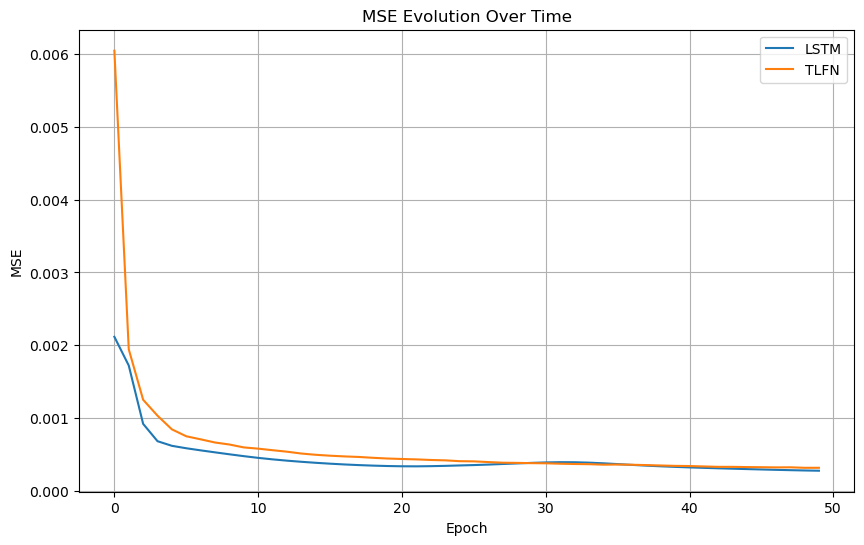

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='LSTM')
plt.plot(history_tln.history['loss'], label='TLFN')
plt.title('MSE Evolution Over Time')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In this exercise, we trained the LSTM and TLN models using data points 2401 to 4900 and tested with data points 4901 to 5000. The test results showed that both models performed very well on this set, with very low mean squared errors (0.00016 and 0.00017). When examining the plot of the MSE evolution over time during training, we can see a drastic reduction in error for both models in the first few epochs, which suggests that the models are quickly learning and adapting to the patterns in the data. However, after around 3 epochs, the reduction in error becomes much more gradual, and around epoch 30, the errors of both models become almost identical and stabilize. These results suggest that both models were able to effectively capture the underlying patterns in the time series data and that further training beyond 30 epochs may not lead to significant improvements in performance. 